In [4]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats('svg')

In [2]:
def createData(m):
    N = 50
    x = torch.randn(N,1)
    y = (m*x) + torch.randn(N,1)/2
    
    return x, y

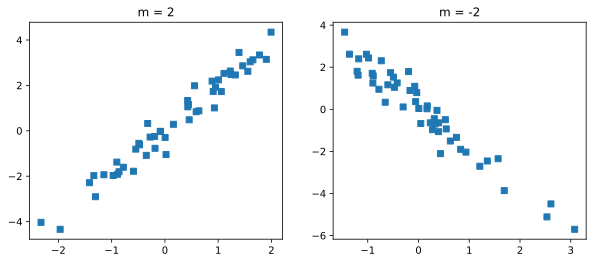

In [45]:
x1,y1 = createData(2)
x2,y2 = createData(-2)

fig, ax = plt.subplots(1, 2, figsize=(10,4))

ax[0].plot(x1, y1, 's')
ax[0].set_title('m = 2')

ax[1].plot(x2, y2, 's')
ax[1].set_title('m = -2')

plt.show()

In [72]:
def createModel(dataFun, m):

    x, y = dataFun(m)

    ANNreg = nn.Sequential(
        nn.Linear(1, 1), 
        nn.ReLU(), 
        nn.Linear(1, 1) 
    )

    learningRate = 0.05
    lossFun = nn.MSELoss()
    optimizer = torch.optim.SGD(ANNreg.parameters(), lr=learningRate)

    numepochs = 200
    losses = torch.zeros(numepochs)

    for epochi in range(numepochs):

        yhat = ANNreg(x) # forward pass

        loss = lossFun(yhat, y) # compute the loss
        losses[epochi] = loss

        # backprop
        optimizer.zero_grad() # initialize gradients to zeros
        loss.backward()
        optimizer.step()
    
    predictions = ANNreg(x)

    testloss = (predictions - y).pow(2).mean()

    return testloss.item(), np.corrcoef(y.T, predictions.detach().T)[0,1]

In [ ]:
noexps = 20
M = np.linspace(-2, 2, 11)

allLosses = np.zeros((M.shape[0], noexps)) 
allCorrCoef = np.zeros((M.shape[0], noexps)) 

for m, slop in enumerate(M):
    for i in range(noexps):
        allLosses[m,i], allCorrCoef[m,i] = createModel(createData, slop)
    print(m)

In [103]:
meanLosses = np.mean(allLosses, axis=1)
meanCorrCoefs = np.nanmean(allCorrCoef, axis=1)

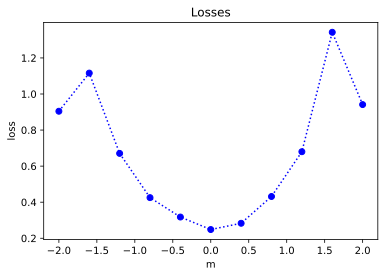

In [104]:
plt.plot(M, meanLosses, 'bo:')
plt.title('Losses')
plt.xlabel('m')
plt.ylabel('loss')
plt.show()

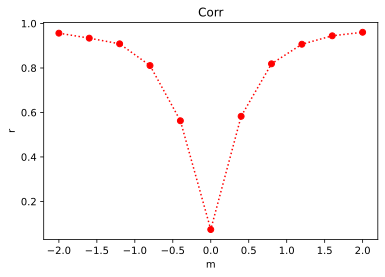

In [106]:
plt.plot(M, meanCorrCoefs, 'ro:')
plt.title('Corr')
plt.xlabel('m')
plt.ylabel('r')
plt.show()